__SVM__

In [ ]:
# Подключение библиотек
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm
from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [ ]:
#Генерируем выборку
X, Y = make_classification(n_samples=150, n_features=2,
                           n_informative=2, n_classes=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=40)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=50, random_state=0)

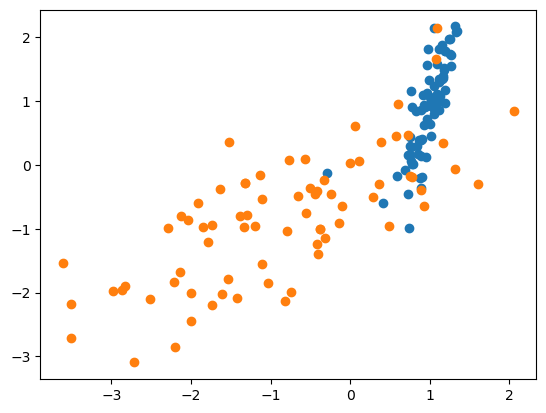

In [ ]:
for k in np.unique(Y):
    pit.plot(X[Y==k, 0], X[Y==k, 1], 'o')
plt.show()

In [59]:
#Обучаем линейную модель
model = SVC(kernel='linear')
_ = model.fit (X_train, Y_train)

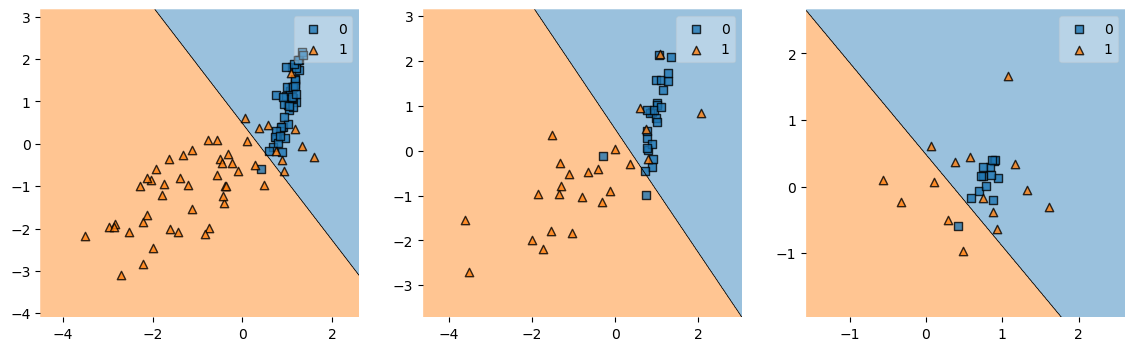

In [ ]:
#Графически отображаем результаты
fig, gs = pit.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)
ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))
plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

__Раздичные ядра для SVM__

In [ ]:
# Геренация новой выборки
np.random.seed(0)
m = 150
n = 2
X = 10*np.random.randn(m, n)
Y = np.array((X[:,0]**2+X[:,1]**2+50*np.random.randn(m))<100, dtype=np.int64)
X_train, X_test, Y_train, Ytest = train_test_split(X, Y, test_size=50, random_state=0)

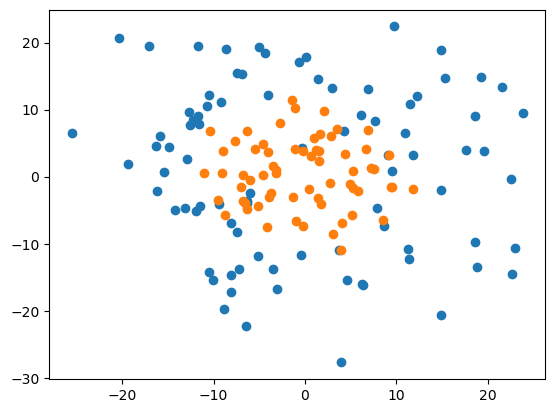

In [ ]:
for k in np.unique(Y):
    pit.plot(X[Y==k, 0], X[Y==k, 1], 'o')
plt.show()

In [63]:
#Обучение полиномиальной модели

model = SVC(kernel='poly')
_ = model.fit (X_train, Y_train)

#сигмоидная модель  model = SVC(kernel='sigmoid')

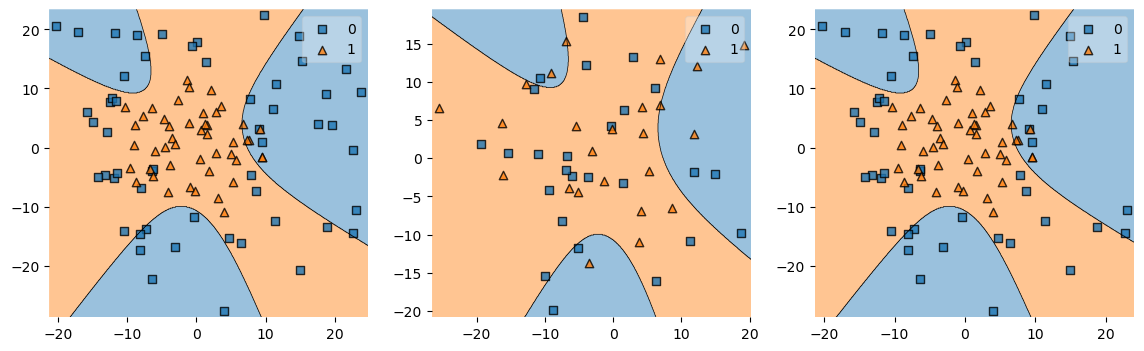

In [ ]:
#Построение
fig, gs = pit.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)
ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))
plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

__Гауссово ядро с радиальной базовой функцией (RBF):  $ K(x_i,x_j)=exp(γ||x_i−x_j||^2)$__


In [65]:
#Обучаем линейную модель
model = SVC(kernel='rbf')
_ = model.fit (X_train, Y_train)

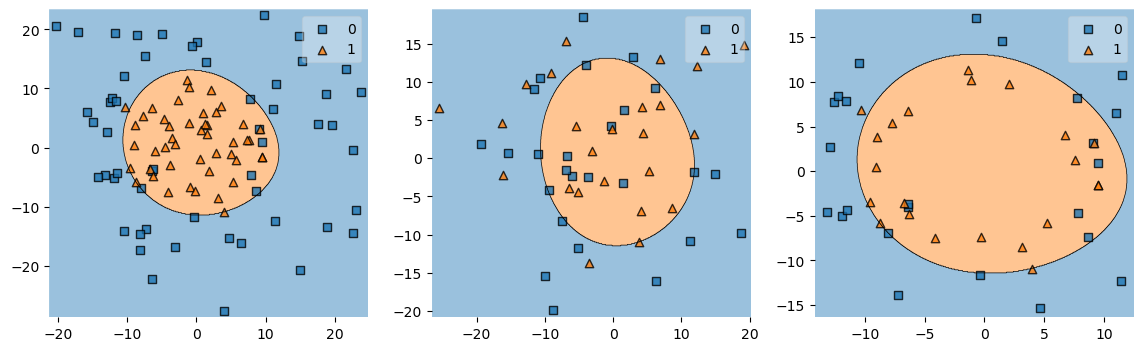

In [ ]:
#Построение
fig, gs = pit.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)
ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))
plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

__SVM Regression__

In [ ]:
np.random.seed(0)
l = 150
# Генерация данных
x = np.linspace(0, 30, num=l)
Y_without_noise = x + 4*np.sin(x)
Y = Y_without_noise + 4*np.random.randn(l)
# Генерация признаков. Два признака х - линейные и np.sin(x) - через синус.
X = np.array([x, np.sin(x)]).T
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=50, random_state=0)


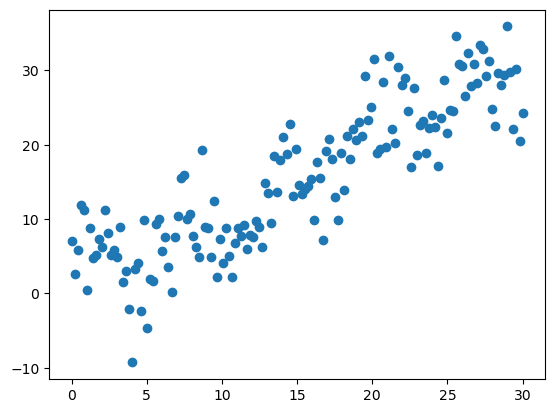

In [68]:
plt.plot(X[:, 0], Y, 'o')
plt.show()

In [69]:
#Ядро RBF
model = SVR(kernel='rbf')
_ = model.fit(X_train, Y_train)

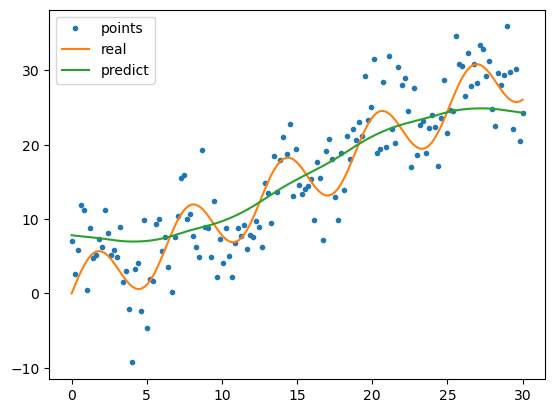

In [ ]:
plt.plot(x, Y,'.', label='points')
plt.plot(x, Y_without_noise, label='real')
plt.plot(x, model.predict(X), label='predict')
pit.legend(loc='best')
pit.show()

In [70]:
#Ядро линейное
model = SVR(kernel='linear')
_ = model.fit(X_train, Y_train)

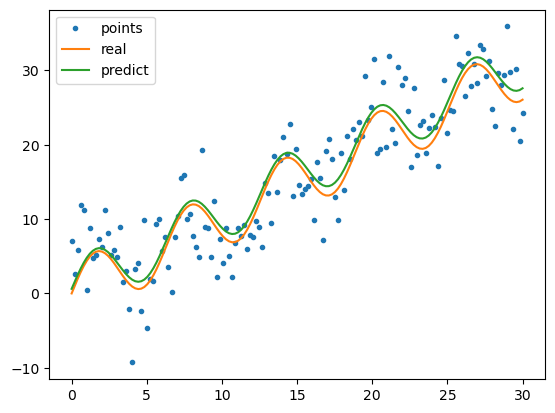

In [ ]:
plt.plot(x, Y,'.', label='points')
plt.plot(x, Y_without_noise, label='real')
plt.plot(x, model.predict(X), label='predict')
pit.legend(loc='best')
pit.show()

In [79]:
np.random.seed(0)
l = 150
# Генерация данных
x = np.linspace(0, 30, num=l)
Y_without_noise = x + 4*np.sin(x)
Y = Y_without_noise + 4*np.random.randn(l)
# Генерация признаков
X = np.array( [x]).T
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=50, random_state=0)


In [80]:
# Организация собственного ядра. Это то-же самое, что и X = np.array([x, np.sin(x)]).T используемое ранее.
def kernel(X1, X2):
    return np.sin(X1)@np.sin(X2).T + X1@X2.T

In [81]:
#Ядро линейное
model = SVR(kernel=kernel)
_ = model.fit(X_train, Y_train)

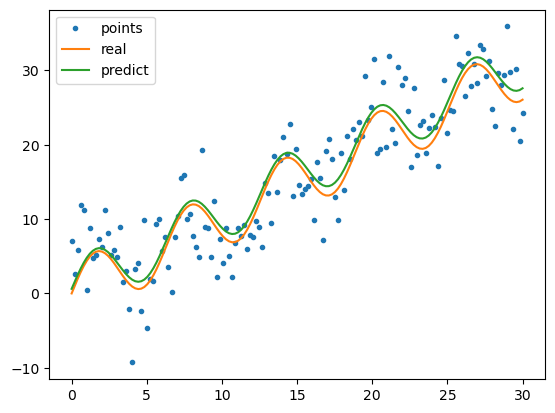

In [ ]:
plt.plot(x, Y,'.', label='points')
plt.plot(x, Y_without_noise, label='real')
plt.plot(x, model.predict(X), label='predict')
pit.legend(loc='best')
pit.show()

__SVM Продолжение__

In [ ]:
X, Y = make_classification(n_samples=2500, n_features=10,
                           n_informative=2, n_classes=2,
                           n_redundant=0, n_clusters_per_class=1,
                           random_state=10)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=500,
                                                    random_state=0)

In [84]:
# RBF ядро
def kernel(X1, X2):
    return np.exp(-0.05*cdist(X1, X2)**2)

In [ ]:
model = SVC(kernel=kernel)
_ = model.fit(X_train, Y_train)
print('Accuracy =', model.score(X_test, Y_test))

Accuracy = 0.916


__Нормализация__

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = SVC(kernel=kernel)
_ = model.fit(X_train, Y_train)
print('Accuracy =', model.score(X_test, Y_test))

Accuracy = 0.912


____Задание____ 

In [ ]:
1. Классификация
Датасет сформирован следующей командой:
X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2)
Подобрать тип ядра и гиперпараметры для данной выборки. Произвести визуальное сравнение разных ядер и разных гиперпараметров. Сравнить точность для разных случаев.

2. Регрессия
Использовать датасет по гиперспектру кукурузы.
Подобрать тип ядра и гиперпараметры для данной выборки. Произвести визуальное сравнение разных ядер и разных гиперпараметров. Сравнить точность для разных случаев.

3. Использовать любой из датасетов и любых два метода классификации или регрессии, изученные на предыдущих занятиях. Произвести сравнение
работы этих методов и метода SVM. Кроме точности использовать и другие метрики качества алгоритма.


Лучшие параметры для SVC: {'C': 0.1, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
Лучшая точность на кросс-валидации: 0.9714
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



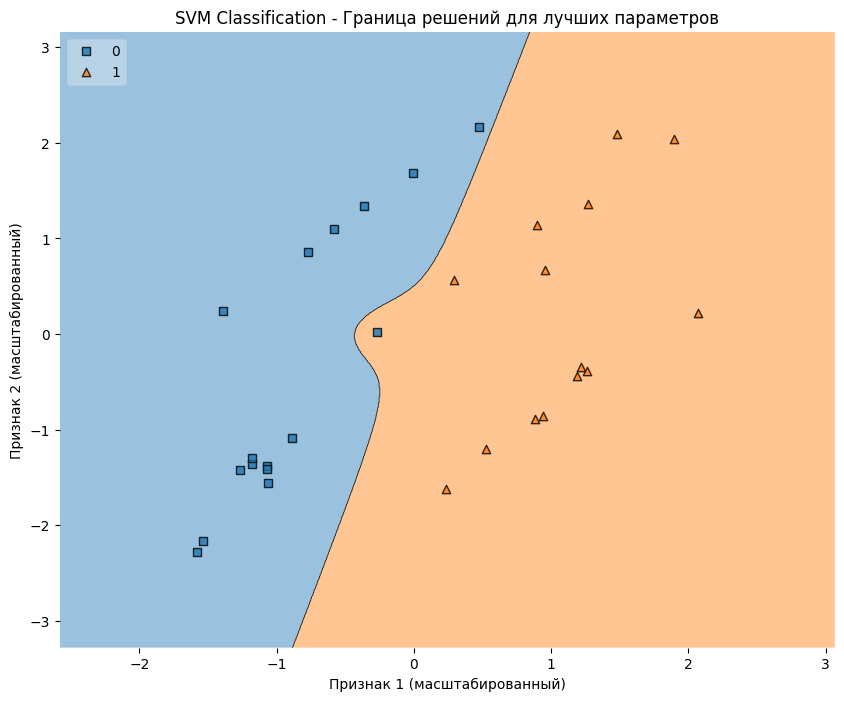


Лучшие параметры для SVR: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Mean Squared Error на тестовом наборе: 0.0021


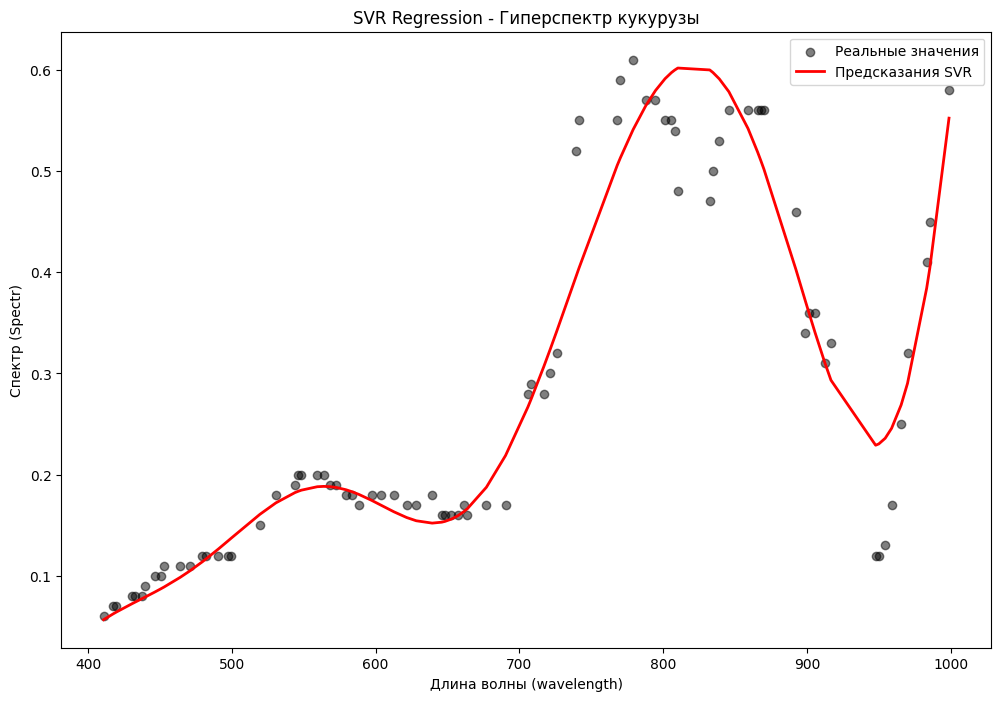

Отчет по классификации: Best SVM
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Отчет по классификации: Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Отчет по классификации: Random Forest
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg     

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, mean_squared_error
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

X_clf, y_clf = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, random_state=42)
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

scaler_clf = StandardScaler()
X_clf_train_scaled = scaler_clf.fit_transform(X_clf_train)
X_clf_test_scaled = scaler_clf.transform(X_clf_test)

param_grid = [
    {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
    {'C': [0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': ['scale', 'auto', 0.1, 1]},
    {'C': [0.1, 1, 10, 100], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto']}
]

grid_search_clf = GridSearchCV(SVC(random_state=42, probability=True), param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_search_clf.fit(X_clf_train_scaled, y_clf_train)

best_clf = grid_search_clf.best_estimator_
print(f"Лучшие параметры для SVC: {grid_search_clf.best_params_}")
print(f"Лучшая точность на кросс-валидации: {grid_search_clf.best_score_:.4f}")

y_clf_pred = best_clf.predict(X_clf_test_scaled)
print(classification_report(y_clf_test, y_clf_pred))

plt.figure(figsize=(10, 8))
plot_decision_regions(X_clf_test_scaled, y_clf_test, clf=best_clf, legend=2)
plt.title("SVM Classification - Граница решений для лучших параметров")
plt.xlabel("Признак 1 (масштабированный)")
plt.ylabel("Признак 2 (масштабированный)")
plt.show()

try:
    df_reg = pd.read_csv('Гиперспектр кукурузы.csv', sep=';', decimal=',')
    df_reg.columns = ['wavelength', 'Spectr']

    X_reg = df_reg[['wavelength']].values
    y_reg = df_reg['Spectr'].values
    X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

    scaler_reg_x = StandardScaler()
    scaler_reg_y = StandardScaler()

    X_reg_train_scaled = scaler_reg_x.fit_transform(X_reg_train)
    X_reg_test_scaled = scaler_reg_x.transform(X_reg_test)
    y_reg_train_scaled = scaler_reg_y.fit_transform(y_reg_train.reshape(-1, 1)).ravel()

    svr_param_grid = [
        {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
        {'C': [0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': ['scale', 'auto', 0.01, 0.1]},
        {'C': [0.1, 1, 10, 100], 'kernel': ['poly'], 'degree': [2, 3]}
    ]

    grid_search_svr = GridSearchCV(SVR(), svr_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    grid_search_svr.fit(X_reg_train_scaled, y_reg_train_scaled)

    best_svr = grid_search_svr.best_estimator_
    print(f"\nЛучшие параметры для SVR: {grid_search_svr.best_params_}")

    y_reg_pred_scaled = best_svr.predict(X_reg_test_scaled)
    y_reg_pred = scaler_reg_y.inverse_transform(y_reg_pred_scaled.reshape(-1, 1))

    mse = mean_squared_error(y_reg_test, y_reg_pred)
    print(f"Mean Squared Error на тестовом наборе: {mse:.4f}")

    plt.figure(figsize=(12, 8))
    plt.scatter(X_reg_test, y_reg_test, color='black', label='Реальные значения', alpha=0.5)

    sort_axis = np.argsort(X_reg_test.ravel())
    plt.plot(X_reg_test[sort_axis], y_reg_pred[sort_axis], color='red', linewidth=2, label='Предсказания SVR')

    plt.title("SVR Regression - Гиперспектр кукурузы")
    plt.xlabel("Длина волны (wavelength)")
    plt.ylabel("Спектр (Spectr)")
    plt.legend()
    plt.show()

except FileNotFoundError:
    print("\nФайл 'Гиперспектр кукурузы.csv' не найден. Задание 2 пропущено.")

dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

dt_clf.fit(X_clf_train_scaled, y_clf_train)
rf_clf.fit(X_clf_train_scaled, y_clf_train)

y_pred_dt = dt_clf.predict(X_clf_test_scaled)
y_pred_rf = rf_clf.predict(X_clf_test_scaled)

print("Отчет по классификации: Best SVM")
print(classification_report(y_clf_test, y_clf_pred))

print("\nОтчет по классификации: Decision Tree")
print(classification_report(y_clf_test, y_pred_dt))

print("\nОтчет по классификации: Random Forest")
print(classification_report(y_clf_test, y_pred_rf))